In [82]:
import xarray as xr
import pandas as pd
import numpy as np
from cast_to_xarray import *

In [83]:
winklerpd1 = pd.read_csv('../O2calib/Cruise1Winkler.csv')
winkler1 = winklerpd1.set_index('Station').to_xarray()

winklerpd2 = pd.read_csv('../O2calib/Cruise2Winkler.csv')
winkler2 = winklerpd2.set_index('Station').to_xarray()

KeyError: "None of ['Station'] are in the columns"

In [84]:
winkler1

<xarray.Dataset>
Dimensions:  (Station: 24)
Coordinates:
  * Station  (Station) object 'Race' 'Race' 'Race' 'Race' ... '4' '4' '4' '4'
Data variables:
    Depth    (Station) float64 1.468 9.843 19.97 41.67 ... 10.54 14.38 22.13
    Oxygen   (Station) float64 234.8 230.6 224.2 214.3 ... 220.0 215.6 214.4

In [85]:
# match the CTD station name with the winkler station name
CTD1_RACE = cast_to_xarray('data_cruise1/TheRace_loop_filter_teos10_bin.cnv', 'Race')
CTD1_5 = cast_to_xarray('data_cruise1/Station5_loop_filter_teos10_bin.cnv', '5')
CTD1_WF = cast_to_xarray('data_cruise1/StationWF_loop_filter_teos10_bin.cnv', 'WF')
CTD1_4 = cast_to_xarray('data_cruise1/Station4_TSwift_loop_filter_teos10_bin.cnv', '4')

In [86]:
#CTD1_RACE

In [87]:
# combine all the casts into one xarray dataset
ctdsection = xr.concat([CTD1_RACE, CTD1_5, CTD1_WF, CTD1_4],"station")
ctdsection

<xarray.Dataset>
Dimensions:       (depth: 159, station: 4)
Coordinates:
  * depth         (depth) float64 1.5 2.0 2.5 3.0 3.5 ... 80.0 80.5 81.0 81.5
    latitude      (station) float64 41.25 41.14 41.05 41.3
    longitude     (station) float64 -72.09 -71.65 -71.47 -71.84
  * station       (station) object 'Race' '5' 'WF' '4'
Data variables:
    temperature   (station, depth) float64 20.0 20.0 19.92 19.91 ... nan nan nan
    salinity      (station, depth) float64 30.54 30.54 30.66 ... nan nan nan
    fluorescence  (station, depth) float64 2.11 1.894 1.866 ... nan nan nan
    oxygen        (station, depth) float64 236.2 236.7 235.2 ... nan nan nan

In [88]:
# the first station is the race
stnname = 'Race'

# get the winkler depths
deptharray = winkler1.sel(Station=stnname).Depth.values

# get the corresponding CTD data
stnsel = ctdsection.sel(station=stnname)
CTDval = stnsel.sel(depth=deptharray, method='nearest').oxygen.values

In [89]:
# do this in a loop
# make an array that combines the data
stnnames = ['Race', '5', 'WF', '4']

CTD_QC=[]
for stnname in stnnames:
    # get the winkler depths
    deptharray = winkler1.sel(Station=stnname).Depth.values

    # get the corresponding CTD data
    stnsel = ctdsection.sel(station=stnname)
    
    for i in range(len(deptharray)):
        CTDval = stnsel.sel(depth=deptharray, method='nearest').oxygen.values[i]
        CTD_QC.append(CTDval)

In [90]:
#CTDval
CTD_QC

[236.203,
 232.664,
 224.584,
 218.165,
 215.718,
 214.697,
 235.357,
 234.902,
 231.147,
 223.359,
 222.175,
 222.175,
 nan,
 240.448,
 225.379,
 225.379,
 216.985,
 202.526,
 160.04,
 nan,
 nan,
 217.921,
 213.612,
 211.012]

In [91]:
Wval=winkler1.Oxygen.values

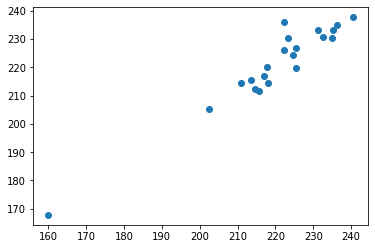

In [92]:
plt.scatter(CTD_QC, Wval)

In [93]:
correlation_matrix = np.corrcoef(CTD_QC, Wval)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

r_squared

nan